In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import keras.backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.utils.np_utils import to_categorical
from keras.constraints import max_norm
from keras.optimizers import SGD

Using Theano backend.


In [46]:
data_set = np.loadtxt('dataset.csv', delimiter=',', dtype=np.uint8)

In [47]:
np.random.shuffle(data_set)
Y = data_set[:,:1].astype('uint8')
X = data_set[:,1:].reshape(data_set.shape[0],900)

In [48]:
trainset_num = int(len(X) * 0.7) # classical split 70/30

X_train = X[:trainset_num]
# X_train = X_train.astype('float32')
X_train = X_train/255

X_test = X[trainset_num:]
# X_test = X_test.astype('float32')
X_test = X_test/255

In [49]:
classes_num = 10

Y_train = Y[:trainset_num]
Y_train = to_categorical(Y_train, classes_num)

Y_test = Y[trainset_num:]
Y_test = to_categorical(Y_test, classes_num)

Отображаем часть картинок с номерами классов.

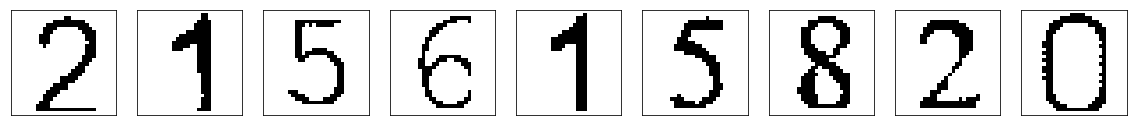

In [50]:
images_n_to_display = 9
sample_images = X_train[:images_n_to_display].reshape((images_n_to_display,30,30))

fig, axes = plt.subplots(ncols=images_n_to_display)
fig.set_figwidth(20)

for i in range(images_n_to_display):
    axes[i].imshow(sample_images[i], cmap=plt.cm.binary_r)
    axes[i].set_xticks(())
    axes[i].set_yticks(())
    axes[i].text(24,3,np.argmax(Y_train[i]), color='white', size='x-large')

In [8]:
model = Sequential()

model.add(Dropout(0.2, input_shape=(900,)))
model.add(Dense(200, activation=K.relu, kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Dense(200, activation=K.relu, kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

optimizer = SGD(momentum=0.9)
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)

Train on 526 samples, validate on 132 samples
Epoch 1/50
526/526 [==============================] - 0s - loss: 2.3668 - acc: 0.1787 - val_loss: 1.7950 - val_acc: 0.3939
Epoch 2/50
526/526 [==============================] - 0s - loss: 1.4605 - acc: 0.4962 - val_loss: 0.8170 - val_acc: 0.7879
Epoch 3/50
526/526 [==============================] - 0s - loss: 0.8121 - acc: 0.7205 - val_loss: 0.4494 - val_acc: 0.8864
Epoch 4/50
526/526 [==============================] - 0s - loss: 0.5116 - acc: 0.8270 - val_loss: 0.2535 - val_acc: 0.9242
Epoch 5/50
526/526 [==============================] - 0s - loss: 0.3498 - acc: 0.8783 - val_loss: 0.1373 - val_acc: 0.9621
Epoch 6/50
526/526 [==============================] - 0s - loss: 0.2465 - acc: 0.9259 - val_loss: 0.1259 - val_acc: 0.9773
Epoch 7/50
526/526 [==============================] - 0s - loss: 0.1525 - acc: 0.9506 - val_loss: 0.0714 - val_acc: 0.9773
Epoch 8/50
526/526 [==============================] - 0s - loss: 0.1600 - acc: 0.9544 - val_l

In [10]:
(loss, score) = model.evaluate(X_test, Y_test)
print(loss, score)

 32/282 [==>...........................] - ETA: 0s

In [13]:
model_prediction = model.predict_classes(X_test)
true_classes = np.argmax(Y_test, 1)
error_indexes = np.argwhere(model_prediction - true_classes)

 32/282 [==>...........................] - ETA: 0s

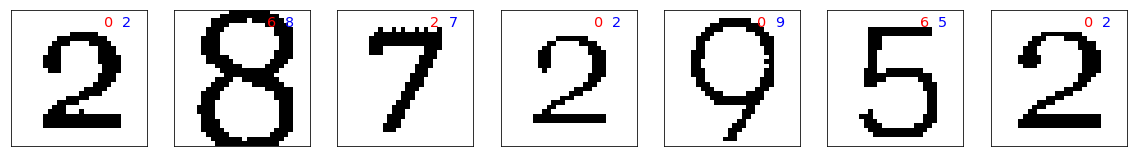

In [14]:
n_errors = len(error_indexes)
images_n_to_display = n_errors if n_errors < 9 else 9

image_indexes = error_indexes[:images_n_to_display].reshape(images_n_to_display)

sample_images = X_test[image_indexes].reshape((images_n_to_display,30,30))

if n_errors != 1 and n_errors != 0:
    fig, axes = plt.subplots(ncols=images_n_to_display)
    fig.set_figwidth(20)
    
    for i in range(images_n_to_display):
        axes[i].imshow(sample_images[i], cmap=plt.cm.binary_r)
        axes[i].set_xticks(())
        axes[i].set_yticks(())
        axes[i].text(24,3,true_classes[image_indexes[i]], color='blue', size='x-large')
        axes[i].text(20,3,model_prediction[image_indexes[i]], color='red', size='x-large')
        
elif n_errors == 1:
    plt.imshow(sample_images[0], cmap=plt.cm.binary_r)
    plt.text(24,3,true_classes[image_indexes[i]], color='blue', size='x-large')
    plt.text(20,3,model_prediction[image_indexes[i]], color='red', size='x-large')

In [16]:
#model.save('classifier.h5')

In [21]:
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPool2D
from keras.layers.core import Flatten

In [51]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3,3), input_shape=(30,30,1), activation=K.relu, data_format='channels_last', kernel_constraint=max_norm(3)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(32, (3,3), activation=K.relu, data_format='channels_last', kernel_constraint=max_norm(3)))
cnn_model.add(MaxPool2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation=K.relu, kernel_constraint=max_norm(3)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation=K.softmax))

epochs = 10
lrate = 0.01
decay = lrate/epochs

optimizer = SGD(lr=lrate ,momentum=0.9, decay=decay)
cnn_model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
cnn_model.fit(X_train.reshape(X_train.shape[0], 30, 30, 1), Y_train, epochs=10, batch_size=32, validation_split=0.2)

Train on 526 samples, validate on 132 samples
Epoch 1/10
526/526 [==============================] - 2s - loss: 2.2830 - acc: 0.1483 - val_loss: 2.2176 - val_acc: 0.4242
Epoch 2/10
526/526 [==============================] - 2s - loss: 1.7345 - acc: 0.4183 - val_loss: 1.0826 - val_acc: 0.5379
Epoch 3/10
526/526 [==============================] - 2s - loss: 0.7507 - acc: 0.7510 - val_loss: 0.3587 - val_acc: 0.9091
Epoch 4/10
526/526 [==============================] - 2s - loss: 0.3045 - acc: 0.8954 - val_loss: 0.1357 - val_acc: 0.9848
Epoch 5/10
526/526 [==============================] - 2s - loss: 0.2201 - acc: 0.9316 - val_loss: 0.0774 - val_acc: 0.9924
Epoch 6/10
526/526 [==============================] - 2s - loss: 0.1257 - acc: 0.9582 - val_loss: 0.0358 - val_acc: 1.0000
Epoch 7/10
526/526 [==============================] - 2s - loss: 0.1561 - acc: 0.9525 - val_loss: 0.1351 - val_acc: 0.9621
Epoch 8/10
526/526 [==============================] - 3s - loss: 0.1217 - acc: 0.9506 - val_l

In [53]:
(loss, score) = cnn_model.evaluate(X_test.reshape(X_test.shape[0], 30, 30, 1), Y_test)
print(loss, score)

282/282 [==============================] - 0s     
0.015423998273 1.0


In [54]:
model_prediction = cnn_model.predict_classes(X_test.reshape(X_test.shape[0], 30, 30, 1))
true_classes = np.argmax(Y_test, 1)
error_indexes = np.argwhere(model_prediction - true_classes)

282/282 [==============================] - 0s     


In [55]:
n_errors = len(error_indexes)
images_n_to_display = n_errors if n_errors < 9 else 9

image_indexes = error_indexes[:images_n_to_display].reshape(images_n_to_display)

sample_images = X_test[image_indexes].reshape((images_n_to_display,30,30))

if n_errors != 1 and n_errors != 0:
    fig, axes = plt.subplots(ncols=images_n_to_display)
    fig.set_figwidth(20)
    
    for i in range(images_n_to_display):
        axes[i].imshow(sample_images[i], cmap=plt.cm.binary_r)
        axes[i].set_xticks(())
        axes[i].set_yticks(())
        axes[i].text(24,3,true_classes[image_indexes[i]], color='blue', size='x-large')
        axes[i].text(20,3,model_prediction[image_indexes[i]], color='red', size='x-large')
        
elif n_errors == 1:
    plt.imshow(sample_images[0], cmap=plt.cm.binary_r)
    plt.text(24,3,true_classes[image_indexes[i]], color='blue', size='x-large')
    plt.text(20,3,model_prediction[image_indexes[i]], color='red', size='x-large')

In [56]:
model.save('classifier_cnn.h5')